# Revenue of a bike retail store: multiple linear regression

                Project for the course: "Mathematics for machine learning" by Opencampus.sh
                                Project by: Miriam Mesghennà

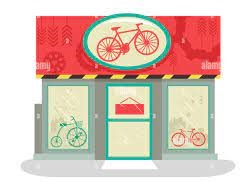

This project aims at predicting the sales of a bike company. In order to do that, I will check if there is a correlation between the money spent by a customer purchase ("Revenue" column) and the following variables: customer age, customer gender and product price. 

Dataset source:

https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa?resource=download


## Contents

### 1) Analysis of the dataset and data cleaning
     
     1.1. Dropping irrelevant columns
     1.2. Information about the columns
     1.3. Data Cleaning
     
### 2) Linear regression analysis

    2.1. Checking for multicollinearity
    2.2. Linear regression model and results

### 3) Conclusion

<br>
<br>
<br>

#### 1.1. Dropping irrelevant columns

In [ ]:
import pandas as pd

In [ ]:
pd.set_option("display.max_rows", 7)
df = pd.read_csv("Bike_store_data.csv")
df

Let's drop the columns "index", "Date", "Year", "Month", "State", "Product Category", "Sub Category","Quantity", "Unit Cost", "Column1":

In [ ]:
df = df.drop(columns=["index", "Date", "Year", "Month", "State", "Product Category","Sub Category","Quantity", "Unit Cost", "Cost", "Column1"])

In [ ]:
df

### 1.2. Information about the columns

In [ ]:
df.info()

### 1.3. Data cleaning

#### Customer Age

In [ ]:
df

"Customer Age" is a "float" Datatype: let's convert it into an "integer" datatype. 
First let's make sure there are no  NaN (not a number) values in the whole dataset:

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull()

Row 34866 has NaN cells. Let's take a closer look at this row:

In [ ]:
df.loc[[34866]]

In [ ]:
# Let's drop row 34866:
df = df.drop(labels=[34866], axis=0)

In [ ]:
df.isnull().sum()

Now we can convert "Customer Age" from "float" into "int":

In [ ]:
df['Customer Age'] = df['Customer Age'].astype('int')

In [ ]:
df.info()

#### Customer Gender

In [ ]:
df

Let's convert "Customer Gender" into a dummy variable: "0" for M, "1" for F

In [ ]:
df['Customer Gender'] = df['Customer Gender'].map({'M': 0,'F': 1})

In [ ]:
df

In [ ]:
df.info()

#### Country

What countries do we have in this dataset?

In [ ]:
df["Country"].value_counts()

Two possibilities:

a) I will drop all other countries and will focus on United States (the country with most observations)

b) I create a dummy variable for each single country (e.g. United States "0/1", Germany "0/1", etc)

 **To keep my model simple, my regression model will focus on the United States market.
 Let's keep only the rows where the column "Country" has the value "United States":**

In [ ]:
df = df[(df["Country"] == "United States")]

In [ ]:
df["Country"].value_counts()

#### "Revenue"

This is the money spent by the customer with their single purchase, hence the revenue for the company. The information comes from the customer receipt. 

In [ ]:
df

We leave "Revenue" as a float variable.


#### Duplicates

In [ ]:
pd.set_option("display.max_rows", 12)
df[df.duplicated(keep=False)].sort_values(by="Revenue")

We can see that there are a few duplicates in this dataset. Usually duplicates get deleted, but for this particular project I chose to leave them instead. This is because it is not unrealistic that some rows report the exact same values: there can be multiple people of the same age, gender and country who made the same purchase.
<br>
<br>
<br>

Here below I drop the column "Country", because now the dataset has been narrowed to the US, hence I don't need this column anymore:

In [ ]:
df = df.drop(columns=["Country"])
df

# Linear regression analysis

With this regression analysis we want to see whether the dependent variable "Revenue" is influenced by customer age, customer gender and unit price 

In [ ]:
y = df["Revenue"]
X = df[["Customer Age", "Customer Gender", "Unit Price"]]

### 2.1. Checking for multicollinearity

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Variance Inflation Factor dataframe
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(X.shape[1])]
  
vif_data

### 2.2. Linear Regression Model and results

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 35)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

In [ ]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set figure size
plt.figure(figsize=(6,6))

# Generate a mask to only show the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross Validation Score of the Test set results
cv_linear = cross_val_score(model, X = X_train, y = y_train, cv=7)

# R2 Score of the Train set results
y_pred_linear_train = model.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# R2 Score of the Test set results
y_pred_linear_test = model.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

print("CV: ", cv_linear)
print()
print('R2_score (train): ', r2_score_linear_train)
print()
print('R2_score (test): ', r2_score_linear_test)

## 3. Conclusion

In this model I analyzed the correlation between the sales of the store and the variables "customer age", "customer gender" and "product price".

***Correlation between sales and price***
<br>

We usually expect that the "price-sales" relationship is the following: when price decreases, the sales increase.
The results of this regression show the opposite trend instead: if the price increases, the sales increase too. This is not something that happens very often, but still it is not impossible: sometimes it depends on the product-niche and on the product itself (e.g. when the brand is very strong, then the customer is willing to pay for the brand).  

***Correlation between sales and customer features***
<br>

I expected to find some correlation between the sales and the customer features, for example "The older the customer, the higher the purchase", or some information about a possible correlation between the customer gender and the sales, but the model didn't show such correlations. 

The cross-validation scores (0,7) and the R squared (0,7) show a good model fit for this data.